In [151]:
# --------------------------------------------------------------------
# Plot Mean Function Activation Trajectory
# --------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [152]:
# --------------------------------------------------------------------
# Load Data
# --------------------------------------------------------------------
results_df = pd.read_csv('../Data/embedding_flow_similarity.csv')  # Assuming you saved it before

# --------------------------------------------------------------------
# Parameters
# --------------------------------------------------------------------
functions = ['control', 'generation', 'justification', 'regulation']

In [153]:
# --------------------------------------------------------------------
# Aggregate Mean Trajectories per Word Position
# --------------------------------------------------------------------
mean_trajectory = results_df.groupby(['function', 'start_word']).agg({'similarity': 'mean'}).reset_index()
mean_trajectory.rename(columns={'start_word': 'position'}, inplace=True)

# --------------------------------------------------------------------
# Compute Transcription Length per Response
# --------------------------------------------------------------------
results_df['transcription_length'] = results_df.groupby(['subject_id', 'question'])['end_word'].transform('max')

# --------------------------------------------------------------------
# Aggregate Mean Trajectories per Normalized Position
# --------------------------------------------------------------------
results_df['normalized_position'] = results_df['start_word'] / results_df['transcription_length']
mean_trajectory_norm = results_df.groupby(['function', 'normalized_position']).agg({'similarity': 'mean'}).reset_index()
mean_trajectory_norm.rename(columns={'normalized_position': 'position'}, inplace=True)

# --------------------------------------------------------------------
# Smoothing Function
def smooth_trajectory(df, window=5):
    grouped = df.groupby('function', group_keys=False)

    smoothed = grouped.apply(
        lambda x: (
            x.sort_values('position')[['position', 'similarity']]
            .rolling(window=window, on='position')
            .mean()
            .assign(function=x['function'].iloc[0])
        )
    )

    return smoothed.dropna()

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


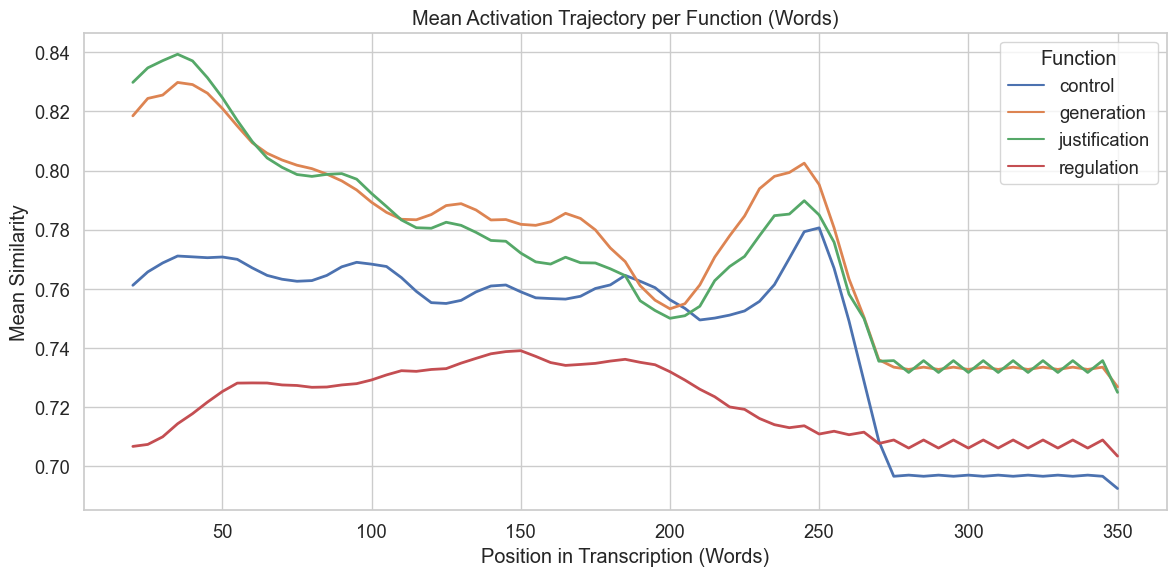

In [154]:
# --------------------------------------------------------------------
# Plot Per-Word Position Trajectory (All Functions Together)
# --------------------------------------------------------------------
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

smoothed = smooth_trajectory(mean_trajectory, window=5).dropna()

sns.lineplot(
    data=smoothed,
    x='position',
    y='similarity',
    hue='function',
    linewidth=2,
)

plt.xlabel('Position in Transcription (Words)')
plt.ylabel('Mean Similarity')
plt.title('Mean Activation Trajectory per Function (Words)')
plt.legend(title="Function")
plt.tight_layout()
os.makedirs('../Output', exist_ok=True)
plt.savefig('../Output/mean_trajectory_per_word_smoothed.png', dpi=600)
plt.show()

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

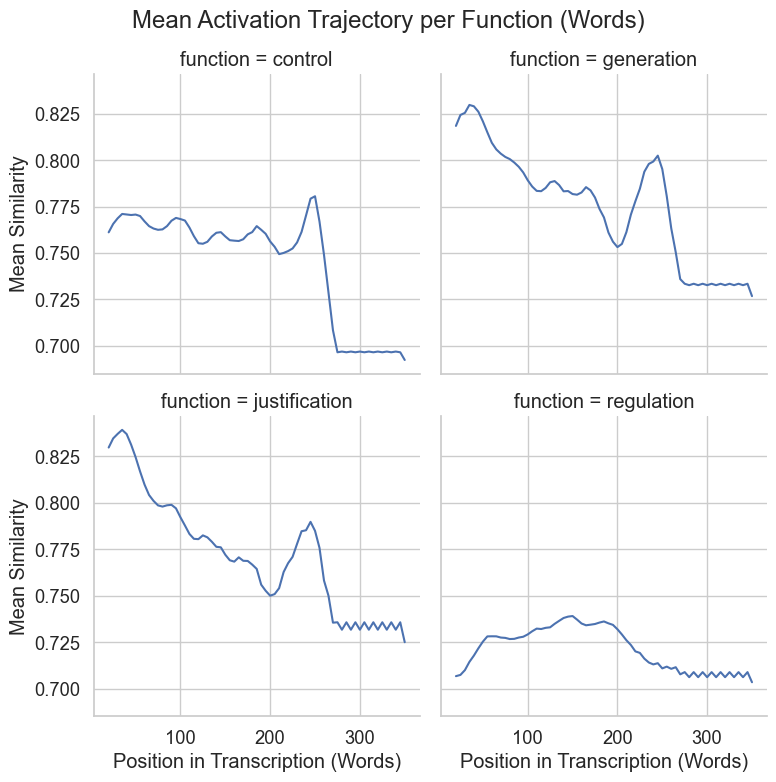

In [155]:
# --------------------------------------------------------------------
# Plot Per-Word Position Trajectory (Separate Plots)
# --------------------------------------------------------------------
g = sns.FacetGrid(smoothed, col="function", col_wrap=2, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="position", y="similarity")
g.set_axis_labels("Position in Transcription (Words)", "Mean Similarity")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Activation Trajectory per Function (Words)')
g.savefig('../Output/mean_trajectory_per_word_facets.png', dpi=600)
plt.show()

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


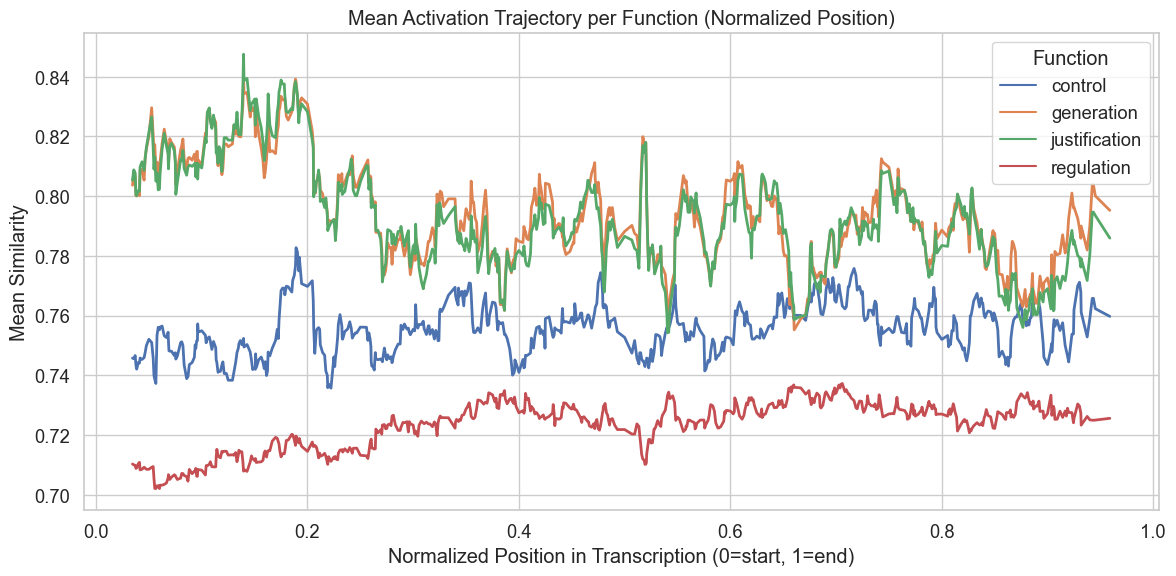

In [156]:
# --------------------------------------------------------------------
# Plot Normalized Position Trajectory (All Functions Together)
# --------------------------------------------------------------------
plt.figure(figsize=(12, 6))

smoothed_norm = smooth_trajectory(mean_trajectory_norm, window=20)

sns.lineplot(
    data=smoothed_norm,
    x='position',
    y='similarity',
    hue='function',
    linewidth=2,
)

plt.xlabel('Normalized Position in Transcription (0=start, 1=end)')
plt.ylabel('Mean Similarity')
plt.title('Mean Activation Trajectory per Function (Normalized Position)')
plt.legend(title="Function")
plt.tight_layout()
plt.savefig('../Output/mean_trajectory_norm_smoothed.png', dpi=600)
plt.show()

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

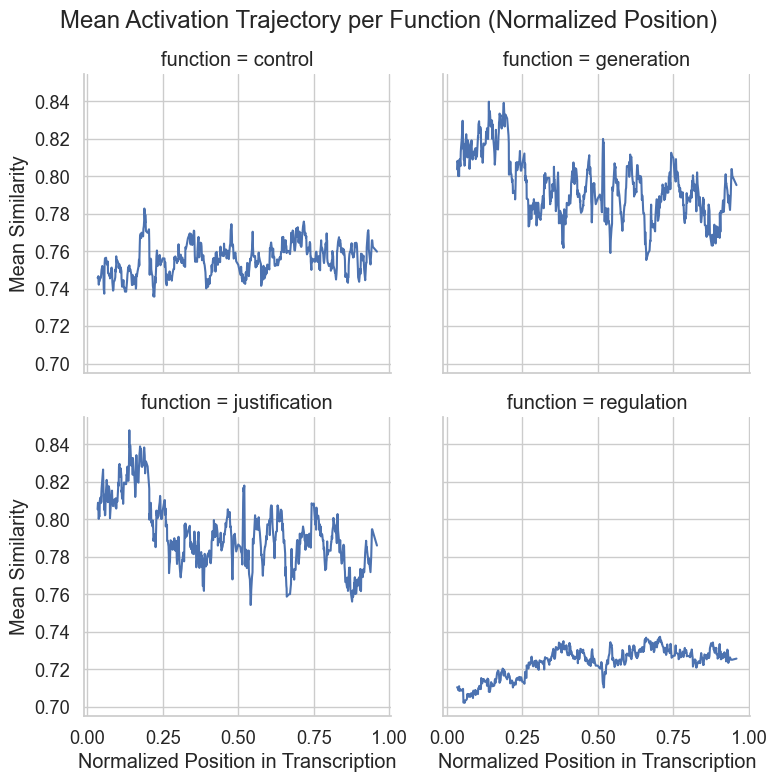

All plots saved in ../Output/


In [157]:
# --------------------------------------------------------------------
# Plot Normalized Position Trajectory (Separate Plots)
# --------------------------------------------------------------------
g = sns.FacetGrid(smoothed_norm, col="function", col_wrap=2, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="position", y="similarity")
g.set_axis_labels("Normalized Position in Transcription", "Mean Similarity")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Activation Trajectory per Function (Normalized Position)')
g.savefig('../Output/mean_trajectory_norm_facets.png', dpi=600)
plt.show()

print("All plots saved in ../Output/")

## By response

Summary Statistics for Transcription Length (Words):
count    1020.000000
mean       14.688235
std         2.998341
min         7.000000
25%        14.000000
50%        16.000000
75%        17.000000
max        18.000000
Name: n_words, dtype: float64

Summary Statistics Grouped by Response:
           count       mean       std  min    25%   50%    75%   max
response                                                            
Incorrect   17.0  12.235294  3.172724  7.0  10.00  13.0  15.00  16.0
Lure       530.0  14.373585  3.320336  7.0  14.00  16.0  17.00  18.0
Other       30.0  14.566667  3.720246  7.0  14.25  16.0  17.00  18.0
Reflect    441.0  15.183673  2.363608  7.0  15.00  16.0  16.00  18.0
Unclear      2.0  11.500000  4.949747  8.0   9.75  11.5  13.25  15.0


/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


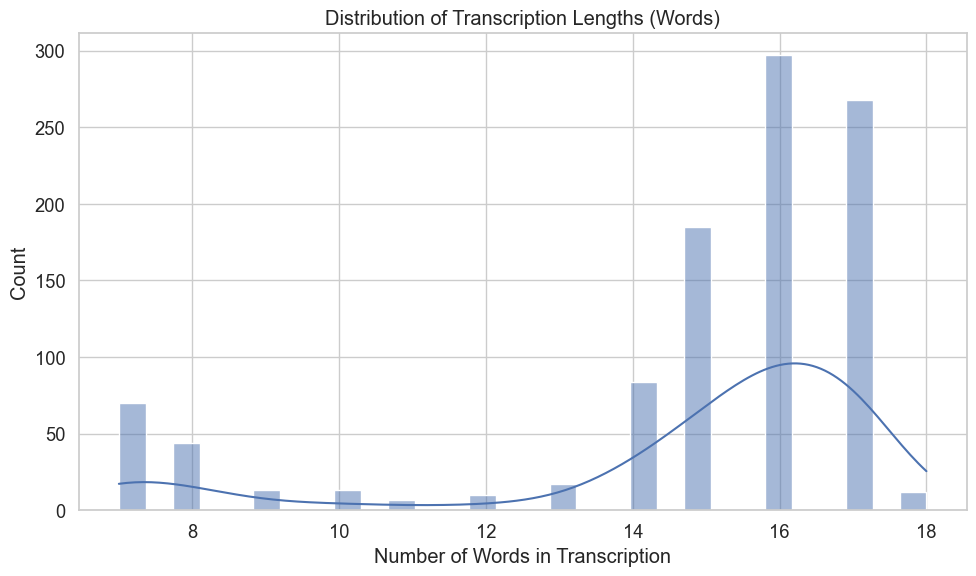

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


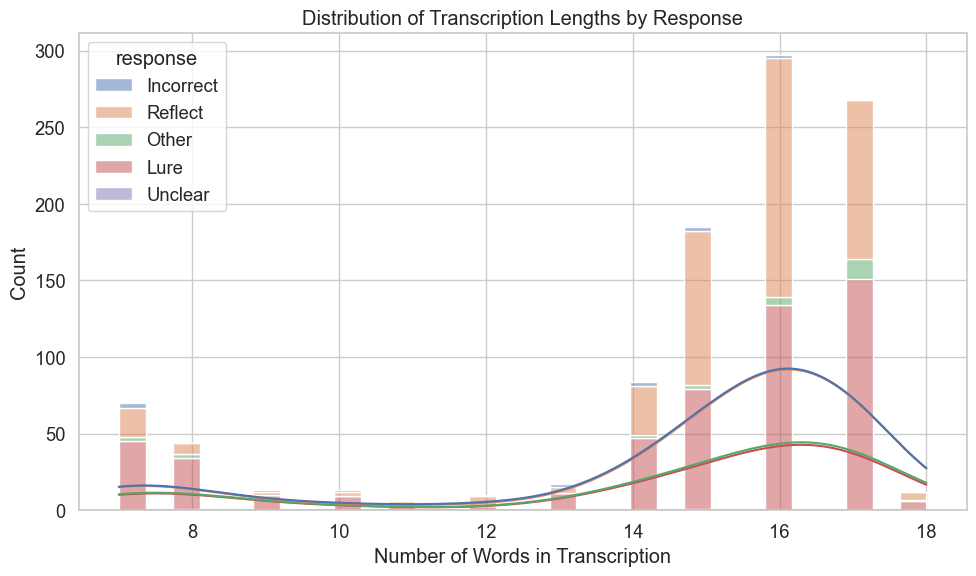

Histograms saved to ../Output/


In [168]:
# --------------------------------------------------------------------
# Compute Transcription Length (Words) per Response
# --------------------------------------------------------------------
transcription_lengths = data_long.groupby(['subject_id', 'question'])['transcription_new'].apply(lambda x: len(str(x).split())).reset_index()
transcription_lengths.rename(columns={'transcription_new': 'n_words'}, inplace=True)

# Merge response info
transcription_lengths = transcription_lengths.merge(
    data_long[['subject_id', 'question', 'response']].drop_duplicates(),
    on=['subject_id', 'question'],
    how='left'
)

# --------------------------------------------------------------------
# Summary Statistics
# --------------------------------------------------------------------
print("Summary Statistics for Transcription Length (Words):")
print(transcription_lengths['n_words'].describe())

print("\nSummary Statistics Grouped by Response:")
print(transcription_lengths.groupby('response')['n_words'].describe())

# --------------------------------------------------------------------
# Plot Histogram of Transcription Length (Overall)
# --------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(transcription_lengths['n_words'], bins=30, kde=True)
plt.xlabel('Number of Words in Transcription')
plt.ylabel('Count')
plt.title('Distribution of Transcription Lengths (Words)')
plt.tight_layout()
plt.savefig('../Output/transcription_length_histogram.png', dpi=600)
plt.show()

# --------------------------------------------------------------------
# Plot Histogram of Transcription Length (Grouped by Response)
# --------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(data=transcription_lengths, x='n_words', hue='response', bins=30, kde=True, multiple='stack')
plt.xlabel('Number of Words in Transcription')
plt.ylabel('Count')
plt.title('Distribution of Transcription Lengths by Response')
plt.tight_layout()
plt.savefig('../Output/transcription_length_histogram_by_response.png', dpi=600)
plt.show()

print("Histograms saved to ../Output/")

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

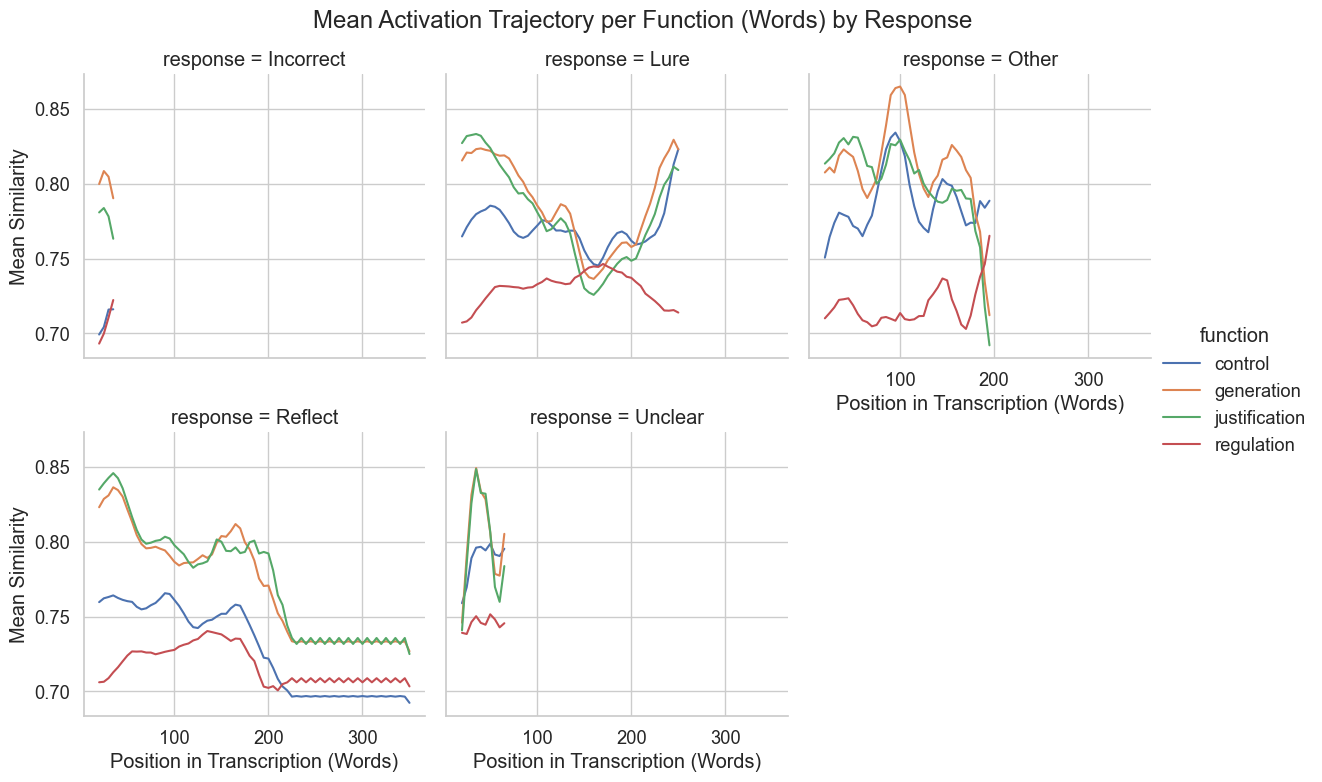

/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lapsyde_user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

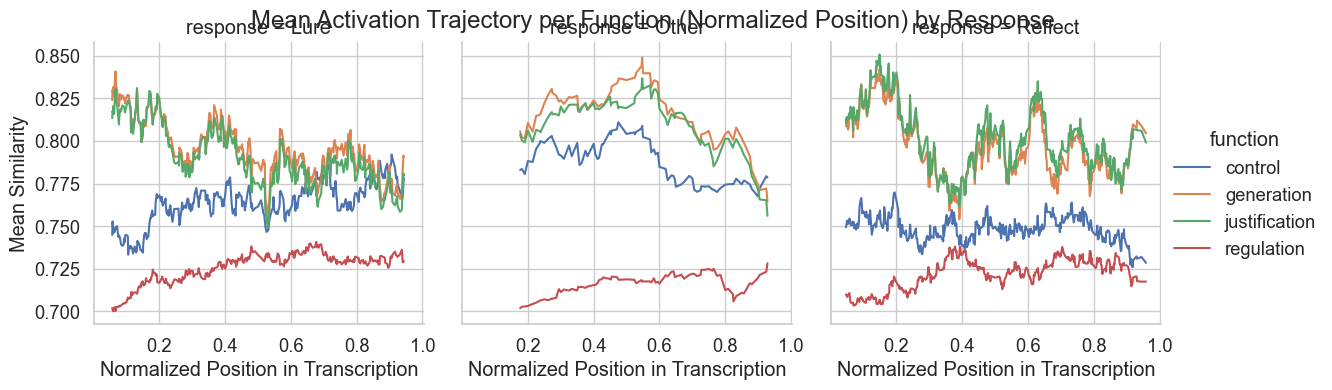

Plots by response saved in ../Output/


In [159]:
# --------------------------------------------------------------------
# Aggregate Mean Trajectories per Word Position by Response
# --------------------------------------------------------------------
mean_trajectory_resp = results_df.groupby(['response', 'function', 'start_word']).agg({'similarity': 'mean'}).reset_index()
mean_trajectory_resp.rename(columns={'start_word': 'position'}, inplace=True)

# --------------------------------------------------------------------
# Aggregate Mean Trajectories per Normalized Position by Response
# --------------------------------------------------------------------
mean_trajectory_norm_resp = results_df.groupby(['response', 'function', 'normalized_position']).agg({'similarity': 'mean'}).reset_index()
mean_trajectory_norm_resp.rename(columns={'normalized_position': 'position'}, inplace=True)

# --------------------------------------------------------------------
# Smoothing Function for Response Grouping
# --------------------------------------------------------------------
def smooth_trajectory_response(df, window=5):
    grouped = df.groupby(['response', 'function'], group_keys=False)

    smoothed = grouped.apply(
        lambda x: (
            x.sort_values('position')[['position', 'similarity']]
            .rolling(window=window, on='position')
            .mean()
            .assign(response=x['response'].iloc[0], function=x['function'].iloc[0])
        )
    )

    return smoothed.dropna()

# --------------------------------------------------------------------
# Plot Per-Word Position Trajectory by Response (Faceted)
# --------------------------------------------------------------------
smoothed_resp = smooth_trajectory_response(mean_trajectory_resp, window=5)

g = sns.FacetGrid(smoothed_resp, col="response", hue="function", col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="position", y="similarity")
g.add_legend()
g.set_axis_labels("Position in Transcription (Words)", "Mean Similarity")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Activation Trajectory per Function (Words) by Response')
g.savefig('../Output/mean_trajectory_per_word_by_response.png', dpi=600)
plt.show()

# --------------------------------------------------------------------
# Plot Normalized Position Trajectory by Response (Faceted)
# --------------------------------------------------------------------
smoothed_norm_resp = smooth_trajectory_response(mean_trajectory_norm_resp, window=20)

g = sns.FacetGrid(smoothed_norm_resp, col="response", hue="function", col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="position", y="similarity")
g.add_legend()
g.set_axis_labels("Normalized Position in Transcription", "Mean Similarity")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Activation Trajectory per Function (Normalized Position) by Response')
g.savefig('../Output/mean_trajectory_norm_by_response.png', dpi=600)
plt.show()

print("Plots by response saved in ../Output/")